In [ ]:
!wget https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/divorce.csv

--2020-08-26 18:58:01--  https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/divorce.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv [following]
--2020-08-26 18:58:01--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19021 (19K) [text/plain]
Saving to: ‘divorce.csv.1’

divorce.csv.1       100%[===================>]  18.58K  --.-KB/s    in 0.007s  

2020-08-26 18:58:01 (2.67 MB/s) - ‘divorce.csv.1’ saved [19021/19021]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Read data
data = pd.read_csv("/content/divorce.csv", delimiter=';')
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
#Insert bias column
data.insert(0,'Bias', 1)

In [ ]:
#Define X and Y
X = data.drop(['Class'],1)
y = data['Class']
X,y

(     Bias  Atr1  Atr2  Atr3  Atr4  ...  Atr50  Atr51  Atr52  Atr53  Atr54
 0       1     2     2     4     1  ...      3      2      3      2      1
 1       1     4     4     4     4  ...      4      4      4      2      2
 2       1     2     2     2     2  ...      1      1      2      2      2
 3       1     3     2     3     2  ...      3      3      2      2      2
 4       1     2     2     1     1  ...      2      2      2      1      0
 ..    ...   ...   ...   ...   ...  ...    ...    ...    ...    ...    ...
 165     1     0     0     0     0  ...      1      4      2      2      2
 166     1     0     0     0     0  ...      2      2      3      2      2
 167     1     1     1     0     0  ...      1      1      3      0      0
 168     1     0     0     0     0  ...      3      2      4      3      1
 169     1     0     0     0     0  ...      1      3      3      3      1
 
 [170 rows x 55 columns], 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 165    0
 16

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'pandas.core.frame.DataFrame'>, Shape-(170, 55)
y: Type-<class 'pandas.core.series.Series'>, Shape-(170,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)



In [ ]:
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (144, 55) , y_train: (144,)
X_test: (26, 55) , y_test: (26,)


In [ ]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1/(1+np.exp(-z))
        ### END CODE HERE
        
        assert z.shape==sig_z.shape, 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''Calculates maximum likelihood estimate
        Remember: y * log(yh) + (1-y) * log(1-yh)
        Note: Likelihood is defined for multiple classes as well, but for this dataset
        we only need to worry about binary/bernoulli likelihood function
        Args:
            y_true : Numpy array of actual truth values (num_samples,)
            y_pred : Numpy array of predicted values (num_samples,)
        Returns:
            Log-likelihood, scalar value
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        likelihood = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        ### END CODE HERE
        
        return likelihood
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, )
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape
        import random
        self.weights = np.random.random(num_features,)
        #print(self.weights)
        # Perform gradient ascent
        for i in range(self.max_iterations):
            print(i, sep=",",end=',')
            # Define the linear hypothesis(z) first
            # HINT: what is our hypothesis function in linear regression, remember?
            #print(weights)
            z = X@self.weights

            
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)
            
            # Calculate the gradient values
            # This is just vectorized efficient way of implementing gradient. Don't worry, we will discuss it later.
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            # Caution: It is gradient ASCENT not descent
            self.weights = self.weights + self.learning_rate*gradient
            
            # Calculating log likelihood
            #likelihood = self.log_likelihood(self, y, y_pred)
            y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
            likelihood = np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

            self.likelihoods.append(likelihood)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = X@self.weights
        probabilities = self.sigmoid(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
            threshold : scalar value above which prediction is 1 else 0
        Returns:
            binary_predictions : Numpy array (num_samples,)
        '''
        # Thresholding probability to predict binary values
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))
        
        return binary_predictions


In [ ]:
# Now initialize logitic regression implemented by you
model = MyLogisticRegression(0.01,1000)

In [ ]:
model.fit(X_train,y_train)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [ ]:
# Train log-likelihood
train_log_likelihood = model.log_likelihood(y_train, model.predict_proba(X_train))
print("Log-likelihood on training data:", train_log_likelihood)

Log-likelihood on training data: -0.09545332025337111


In [ ]:
# Test log-likelihood
test_log_likelihood = model.log_likelihood(y_test, model.predict_proba(X_test))
print("Log-likelihood on testing data:", test_log_likelihood)

Log-likelihood on testing data: -0.05210138716043384


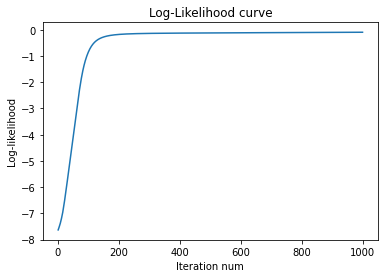

In [ ]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

In [ ]:
#Make predictions on test data
y_pred = model.predict(X_test)

In [ ]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, )
        y_pred : Predicted binary values (num_examples, )
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE

    tp=0
    #tn=0
    for i in range(len(y_pred)):
      #print(y_true[i],",",y_pred[i])
      if y_true[i] == y_pred[i]:
        tp+=1
    accuracy = tp/len(y_true)
    ### END CODE HERE
    return accuracy

In [ ]:
# Print accuracy on train data
y_pred=model.predict(X_train)
#np.array(y_train)
accuracy(np.array(y_train), y_pred)
#0.9915966386554622 accuracy with 30% test set

0.9791666666666666

In [ ]:
# Print accuracy on test data
y_pred=model.predict(X_test)
#np.array(y_train)
accuracy(np.array(y_test), y_pred)
#0.9411764705882353 accuracy with 30% test set

0.9615384615384616

In [ ]:
#Logistic Regression using sklearn
#Part 1.2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Define X and y
X,y

In [ ]:
# Initialize the model from sklearn
model2 = LogisticRegression()

In [ ]:
model2.fit(X_train, y_train)

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
test_accuracy_sklearn = accuracy_score(y_test,y_pred)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 1.0
